Ref.: https://www.databriefing.com/coding/predict-sales-1/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# get rossmann, store, & test csv files as a DataFrame
data  = pd.read_csv("train.csv")
store_df     = pd.read_csv("store.csv")
test_df      = pd.read_csv("test.csv")

C:\Users\Ing-Figueroa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [7]:
data.StateHoliday = data.StateHoliday.astype(str)

In [8]:
def count_unique(column):
    return len(column.unique())

data.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int32

In [9]:
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

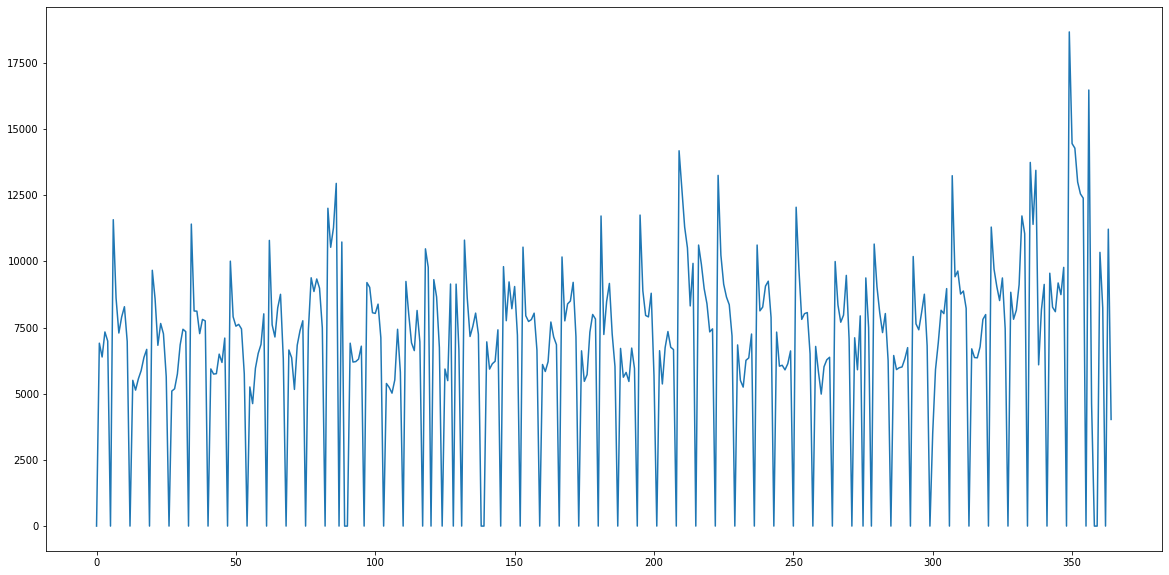

In [10]:
store_data = data[data.Store==150].sort_values('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales.values[:365])

C:\Users\Ing-Figueroa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


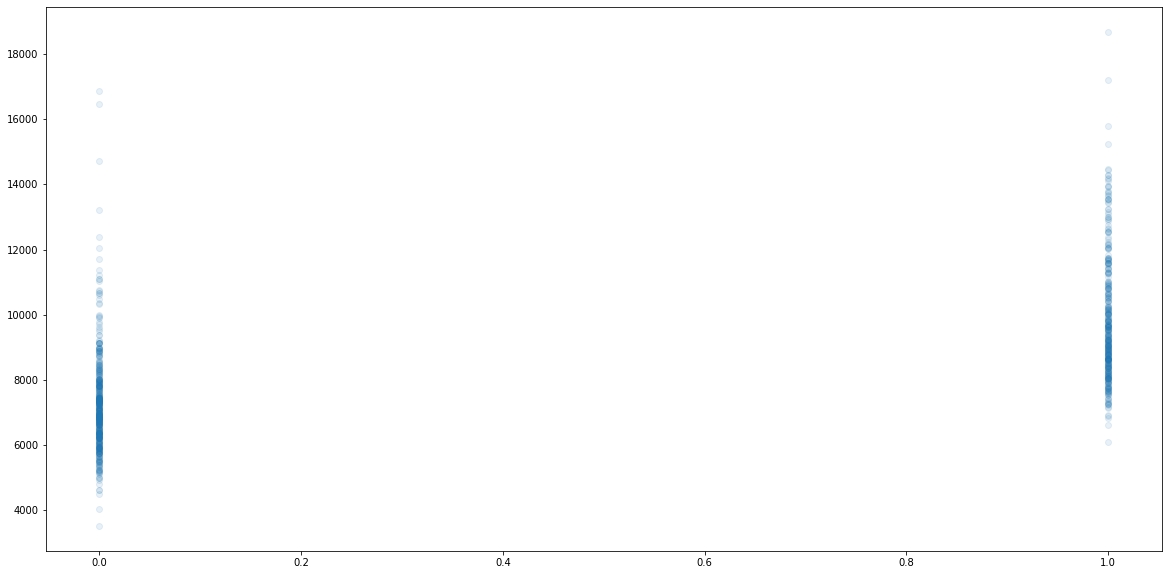

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(x=store_data[data.Open==1].Promo, y=store_data[data.Open==1].Sales, alpha=0.1)

In [12]:
transformed_data = data.drop(['Store', 'Date', 'Customers'], axis=1)

In [13]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [14]:
transformed_data = transformed_data[0:500000]

In [15]:
transformed_data.shape

(500000, 15)

In [16]:
X = transformed_data.drop(['Sales'], axis=1)
y = transformed_data.Sales

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400000, 14)
(100000, 14)
(400000,)
(100000,)


In [19]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [20]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2603.8776929239825
R2 score is 0.5598494008410997


The model performance for testing set
--------------------------------------
RMSE is 2583.5070491301835
R2 score is 0.565958531388385


### Ridge

In [21]:
ridge = Ridge().fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, Y_test)))

Training set score: 0.56
Test set score: 0.57


In [22]:
ridge10 = Ridge(alpha=15).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, Y_test)))

Training set score: 0.56
Test set score: 0.57


In [23]:
ridge01 = Ridge(alpha=0.1).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, Y_test)))

Training set score: 0.56
Test set score: 0.57


### Lasso

In [24]:
lasso00001 = Lasso(alpha=0.1, max_iter=10).fit(X_train, Y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, Y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.56
Test set score: 0.57
Number of features used: 14


C:\Users\Ing-Figueroa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294909753580.141, tolerance: 616169016.0289376
  positive)


### Create quadratic features

In [25]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_train)
X_cubic = cubic.fit_transform(X_train)

In [26]:
lm_cuad = lin_model.fit(X_quad, Y_train)
y_quad_fit = lm_cuad.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(Y_test, y_quad_fit) #lm.predict(X_quad))
print(quadratic_r2)

0.5735015038371174
